In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
url = "https://api.covidtracking.com/v1/states/daily.csv"
df = pd.read_csv(url)

In [11]:
df.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200810,AK,4539.0,275804.0,NaN,37.0,NaN,NaN,NaN,3.0,...,280343,0,0,b509299c436632a9bb6c07a37fe0a942ba42d736,0,0,0,0,0,NaN
1,20200810,AL,103020.0,677547.0,NaN,1528.0,12070.0,NaN,1249.0,NaN,...,780567,29,533,bc7c88c5e4e61a5aacd73bceef95889e5b77bbd3,0,0,0,0,0,NaN
2,20200810,AR,50028.0,519292.0,NaN,508.0,3336.0,NaN,NaN,117.0,...,569320,11,52,3003372b79996f2d842ac417e2dceaab2971a7b3,0,0,0,0,0,NaN
3,20200810,AS,0.0,1396.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1396,0,0,ccffb3614fb87b4cafee3b19c44d3eb7d10d5913,0,0,0,0,0,NaN
4,20200810,AZ,187523.0,840708.0,NaN,1575.0,19277.0,506.0,NaN,366.0,...,1028231,4,9,56226bd3514052487433ab4eeb94e8ef3f6e058f,0,0,0,0,0,NaN


In [13]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

In [14]:
datatypes = df.dtypes
print(datatypes)

date                        datetime64[ns]
state                               object
positive                           float64
negative                           float64
pending                            float64
hospitalizedCurrently              float64
hospitalizedCumulative             float64
inIcuCurrently                     float64
inIcuCumulative                    float64
onVentilatorCurrently              float64
onVentilatorCumulative             float64
recovered                          float64
dataQualityGrade                    object
lastUpdateEt                        object
dateModified                        object
checkTimeEt                         object
death                              float64
hospitalized                       float64
dateChecked                         object
totalTestsViral                    float64
positiveTestsViral                 float64
negativeTestsViral                 float64
positiveCasesViral                 float64
deathConfir

In [21]:
df['state']  = df['state'].astype(str)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8865 entries, 0 to 8864
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      8865 non-null   datetime64[ns]
 1   state                     8865 non-null   object        
 2   positive                  8850 non-null   float64       
 3   negative                  8709 non-null   float64       
 4   pending                   1110 non-null   float64       
 5   hospitalizedCurrently     6253 non-null   float64       
 6   hospitalizedCumulative    4815 non-null   float64       
 7   inIcuCurrently            3256 non-null   float64       
 8   inIcuCumulative           1313 non-null   float64       
 9   onVentilatorCurrently     2830 non-null   float64       
 10  onVentilatorCumulative    466 non-null    float64       
 11  recovered                 5606 non-null   float64       
 12  dataQualityGrade    

In [33]:
df.fillna(value = -1, inplace = True)
df.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2020-08-10,AK,4539.0,275804.0,-1.0,37.0,-1.0,-1.0,-1.0,3.0,...,280343,0,0,b509299c436632a9bb6c07a37fe0a942ba42d736,0,0,0,0,0,-1.0
1,2020-08-10,AL,103020.0,677547.0,-1.0,1528.0,12070.0,-1.0,1249.0,-1.0,...,780567,29,533,bc7c88c5e4e61a5aacd73bceef95889e5b77bbd3,0,0,0,0,0,-1.0
2,2020-08-10,AR,50028.0,519292.0,-1.0,508.0,3336.0,-1.0,-1.0,117.0,...,569320,11,52,3003372b79996f2d842ac417e2dceaab2971a7b3,0,0,0,0,0,-1.0
3,2020-08-10,AS,0.0,1396.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1396,0,0,ccffb3614fb87b4cafee3b19c44d3eb7d10d5913,0,0,0,0,0,-1.0
4,2020-08-10,AZ,187523.0,840708.0,-1.0,1575.0,19277.0,506.0,-1.0,366.0,...,1028231,4,9,56226bd3514052487433ab4eeb94e8ef3f6e058f,0,0,0,0,0,-1.0


*Function to show general statistics for one variable for a given state*

In [32]:
def plot_variable_per_state(var = 'positive', state = 'IN'):
    """
    Basic bar chart displaying one variable for a state based on dates
    """
    state_info = df[df['state'] == state]
    x = state_info['date']
    y = state_info[var]
    plt.title("{} for {}".format(var,state))
    plt.bar(x=x,height=y)
    plt.grid(True)
    plt.show()

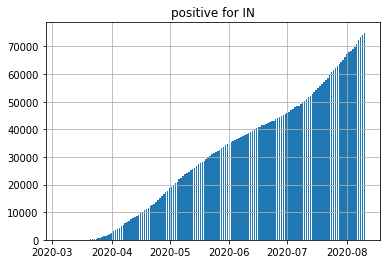

In [34]:
plot_variable_per_state()

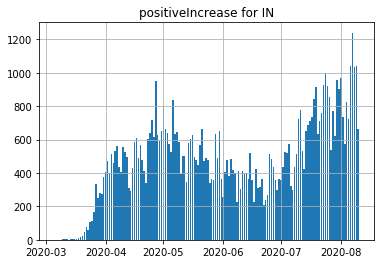

In [35]:
plot_variable_per_state('positiveIncrease')

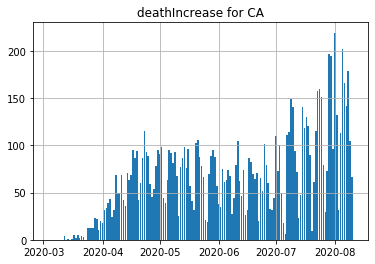

In [38]:
plot_variable_per_state('deathIncrease', 'CA')

*Function to calculate the fatality ratio*

In [65]:
def fatality_ratio(state = 'IN'):
    """
    Fatality ratio is death to positive test results
    Only take the latest info -- most recent date
    """
    date = df.iloc[0]['date']
    death_count = float(df[(df['state'] == state) & (df['date'] == date)]['death'])
    positive_count = float(df[(df['state'] == state) & (df['date'] == date)]['positive'])
    
    fatality_ratio = -1
    if (death_count >= 0) and (positive_count > 0):
        fatality_ratio = death_count/positive_count
    return fatality_ratio

In [67]:
ft = fatality_ratio()
print(ft)

0.04059099637294645


In [72]:
def recovery_ratio(state = 'IN'):
    """
    Recovery ratio is recovered to positive test results
    Only take the lastest date info
    """
    date = df.iloc[0]['date']
    recovered_count = float(df[(df['state'] == state) & (df['date'] == date)]['recovered'])
    positive_count = float(df[(df['state'] == state) & (df['date'] == date)]['positive'])
    
    recovery_ratio = -1
    if (recovered_count >= 0) and (positive_count > 0):
        recovery_ratio = recovered_count/positive_count
    return recovery_ratio

In [73]:
print(recovery_ratio())

0.7209835715809686


In [76]:
def positive_test_ratio(state = 'IN'):
    """
    Calulate number of postive tests from total tests for the latest given date
    """
    date = df.iloc[0]['date']
    positive_count = float(df[(df['state'] == state) & (df['date'] == date)]['positive'])
    tested_count = float(df[(df['state'] == state) & (df['date'] == date)]['totalTestResults'])
    
    positive_ratio = -1
    if (positive_count >= 0) and (tested_count > 0):
        positive_ratio = positive_count/tested_count
    return positive_ratio

In [77]:
print(positive_test_ratio())

0.08800731360116229


*Function to display to compare two variables for a given state*

In [81]:
def plot_two_variables_per_state(var_1 = 'positive', var_2 = 'totalTestResults', state = 'IN'):
    state_info = df[df['state'] == state]
    x = state_info[var_1]
    y = state_info[var_2]
    
    plt.title("{} vs {} for {}".format(var_1, var_2, state))
    plt.scatter(x=x, y=y)
    plt.grid(True)
    plt.show()

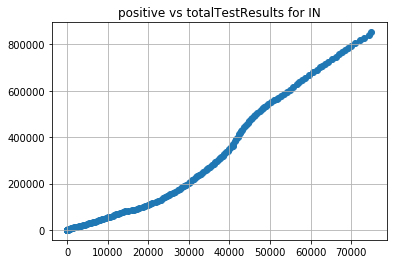

In [82]:
plot_two_variables_per_state()

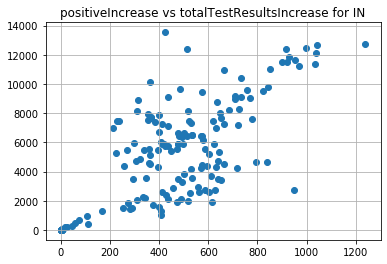

In [83]:
plot_two_variables_per_state('positiveIncrease', 'totalTestResultsIncrease')